### Examples of using logic gates


In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '../../')
import SchemDraw as schem
import SchemDraw.elements as e
import SchemDraw.logic as l

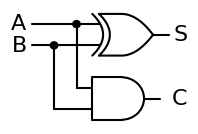

In [2]:
# Half adder
d = schem.Drawing(unit=.5)
S = d.add(l.XOR2, rgtlabel='$S$')
A = d.add(e.DOT, xy=S.in1)
d.add(e.LINE, d='left', l=d.unit*2, lftlabel='$A$')
d.add(e.LINE, d='left', xy=S.in2)
B = d.add(e.DOT)
d.add(e.LINE, d='left', lftlabel='$B$')

d.add(e.LINE, d='down', xy=A.start, l=d.unit*3)
C = d.add(l.AND2, d='right', anchor='in1', rgtlabel='$C$')
d.add(e.LINE, d='down', xy=B.start, toy=C.in2)
d.add(e.LINE, to=C.in2)
d.draw()
d.save('half_add.svg')


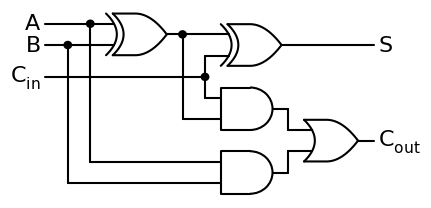

In [3]:
# Full adder
d = schem.Drawing(unit=.5)
X1 = d.add(l.XOR2)
d.add(e.DOT)
A = d.add(e.DOT, xy=X1.in1)
Ain = d.add(e.LINE, d='left', l=d.unit*2, lftlabel='$A$')
d.add(e.LINE, d='left', xy=X1.in2)
B = d.add(e.DOT)
d.add(e.LINE, d='left', lftlabel='$B$')

d.add(e.LINE, xy=X1.out, d='right', l=d.unit)
X2 = d.add(l.XOR2, anchor='in1')
C = d.add(e.LINE, d='down', xy=X2.in2, l=d.unit*2)
d.push()
d.add(e.DOT, xy=C.center)
d.add(e.LINE, d='left', tox=Ain.end, lftlabel='$C_{in}$')
d.pop()

A1 = d.add(l.AND2, d='right', anchor='in1')
d.add(e.LINE, d='left', xy=A1.in2, tox=X1.out)
d.add(e.LINE, d='up', toy=X1.out)

A2 = d.add(l.AND2, d='right', anchor='in1', xy=[A1.in1[0],A1.in2[1]-d.unit*2])
d.add(e.LINE, xy=A2.in1, d='left', tox=A.start)
d.add(e.LINE, d='up', toy=A.start)
d.add(e.LINE, xy=A2.in2, d='left', tox=B.start)
d.add(e.LINE, d='up', toy=B.start)

O1 = d.add(l.OR2, d='right', xy=[A1.out[0],(A1.out[1]+A2.out[1])/2], rgtlabel='$C_{out}$')
d.add(e.LINE, xy=A1.out,d='down', toy=O1.in1)
d.add(e.LINE, xy=A2.out,d='up', toy=O1.in2)

d.add(e.LINE, xy=X2.out, d='right', tox=O1.out, rgtlabel='$S$')

d.draw()
d.save('full_add.svg')


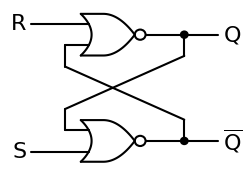

In [4]:
# SR Latch
d = schem.Drawing()
d.add(e.LINE, l=d.unit/4, lftlabel='$R$')
G1 = d.add(l.NOR2, anchor='in1')
d.add(e.LINE, l=d.unit/4)
Q = d.add(e.DOT)
d.add(e.LINE, l=d.unit/4, rgtlabel='$Q$')

G2 = d.add(l.NOR2, anchor='in1', xy=[G1.in1[0],G1.in1[1]-2.5])
d.add(e.LINE, l=d.unit/4)
Qb = d.add(e.DOT)
d.add(e.LINE, l=d.unit/4, rgtlabel='$\overline{Q}$')

S1 = d.add(e.LINE, xy=G2.in1, d='up', l=d.unit/6)
d.add(e.LINE, d='down', xy=Q.start, l=d.unit/6)
d.add(e.LINE, to=S1.end)

R1 = d.add(e.LINE, xy=G1.in2, d='down', l=d.unit/6)
d.add(e.LINE, d='up', xy=Qb.start, l=d.unit/6)
d.add(e.LINE, to=R1.end)

d.add(e.LINE, d='left', xy=G2.in2, l=d.unit/4, lftlabel='$S$')

d.draw()
d.save('SR_latch_gate.svg')

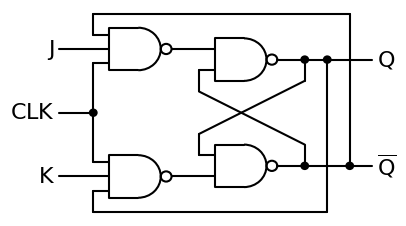

In [5]:
# JK Flip Flop
d = schem.Drawing()

# Two front gates (SR latch)
G1 = d.add(l.NAND2, anchor='in1')
d.add(e.LINE, l=d.unit/6)
Q1 = d.add(e.DOT)
d.add(e.LINE, l=d.unit/6)
Q2 = d.add(e.DOT)
d.add(e.LINE, l=d.unit/3, rgtlabel='$Q$')
G2 = d.add(l.NAND2, anchor='in1', xy=[G1.in1[0],G1.in1[1]-2.5])
d.add(e.LINE, l=d.unit/6)
Qb = d.add(e.DOT)
d.add(e.LINE, l=d.unit/3)
Qb2 = d.add(e.DOT)
d.add(e.LINE, l=d.unit/6, rgtlabel='$\overline{Q}$')

S1 = d.add(e.LINE, xy=G2.in1, d='up', l=d.unit/6)
d.add(e.LINE, d='down', xy=Q1.start, l=d.unit/6)
d.add(e.LINE, to=S1.end)
R1 = d.add(e.LINE, xy=G1.in2, d='down', l=d.unit/6)
d.add(e.LINE, d='up', xy=Qb.start, l=d.unit/6)
d.add(e.LINE, to=R1.end)

# Two back gates
d.add(e.LINE, xy=G1.in1, d='left', l=d.unit/6)
J = d.add(l.NAND3, anchor='out', reverse=True)
d.add(e.LINE, xy=J.in3, d='up', l=d.unit/6)
d.add(e.LINE, d='right', tox=Qb2.start)
d.add(e.LINE, d='down', toy=Qb2.start)
d.add(e.LINE, d='left', xy=J.in2, l=d.unit/4, lftlabel='$J$')

d.add(e.LINE, xy=G2.in2, d='left', l=d.unit/6)
K = d.add(l.NAND3, anchor='out', reverse=True)
d.add(e.LINE, xy=K.in1, d='down', l=d.unit/6)
d.add(e.LINE, d='right', tox=Q2.start)
d.add(e.LINE, d='up', toy=Q2.start)
d.add(e.LINE, d='left', xy=K.in2, l=d.unit/4, lftlabel='$K$')

C = d.add(e.LINE, d='down', xy=J.in1, toy=K.in3)
d.add(e.DOT, xy=C.center)
d.add(e.LINE, d='left', xy=C.center, l=d.unit/4, lftlabel='$CLK$')

d.draw()
d.save('JK.svg')